## Projeto Analise Socieconomica em resultado de Provas de avaliação de ensino

Foi feito o entendimento da base de dados que consiste em 62 respostas de questões diversas sobre a vida escolar e socieconomicas de diversos estudantes.


In [74]:
import ClassesAnalise as CA

In [75]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [214]:
df = pd.read_csv('SARESP_train.csv')

C:\Users\lucia\AppData\Local\Temp\ipykernel_33272\652475977.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


Iniciando a etapa de Preparação dos Dados será feita:
- analise de nulos
- analise de correlação de features
- analise dos tipos de cada variavel
- analise de conteudo de variaveis

Etapa adicional de classificação, verificar se as classes da variavel resposta estão balanceadas
No caso não estão

In [215]:
print(df['nivel_profic_mat'].value_counts())

Básico              54294
Abaixo do Básico    44891
Adequado            17132
Avançado             4279
Name: nivel_profic_mat, dtype: int64


In [216]:
df.loc[df["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'

In [217]:
print(df2['nivel_profic_mat'].value_counts())

2    32576
0    22445
1    21411
Name: nivel_profic_mat, dtype: int64


In [218]:
df.dtypes


CD_ALUNO              int64
NOMESC               object
Q1                   object
Q2                   object
Q3                   object
                     ...   
porc_ACERT_MAT      float64
porc_ACERT_CIE      float64
nivel_profic_lp      object
nivel_profic_mat     object
nivel_profic_cie     object
Length: 88, dtype: object

In [224]:
df.isna().sum().sort_values()

CD_ALUNO            0
Q58                 0
Q57                 0
Q56                 0
Q55                 0
                   ..
Q23                 0
Q22                 0
Q21                 0
Q19                 0
nivel_profic_cie    0
Length: 83, dtype: int64

Será removida qualquer coluna com mais de 10% de dados faltantes

In [220]:
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")

In [225]:
df = CA.typeEncoder(df,'object')

In [226]:
df2 = df.drop(df[df['nivel_profic_mat'] == 2].sample(frac=.4).index)

In [227]:
df2 = df2.drop(df[df['nivel_profic_mat'] == 0].sample(frac=.5).index)

In [228]:
df= df2

In [229]:
df = CA.typeEncoder(df,'object')

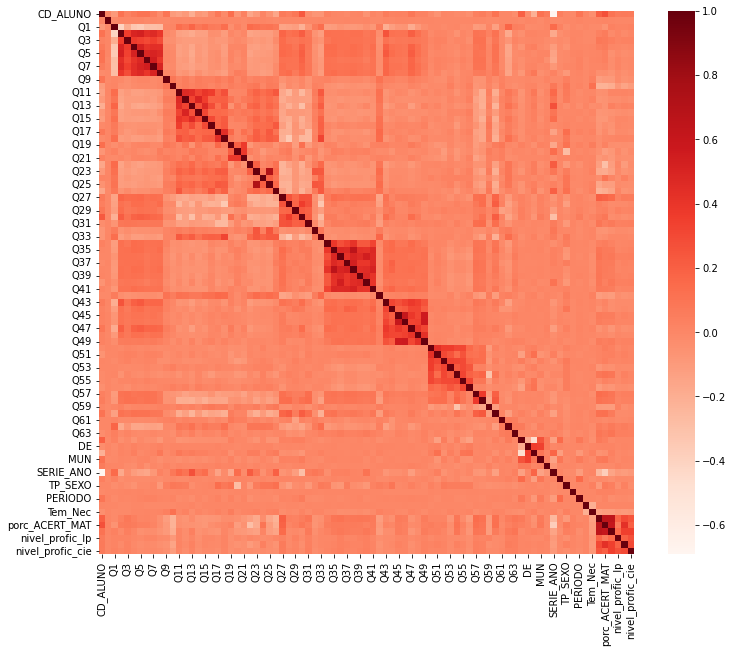

In [230]:
from matplotlib import pyplot


plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,  cmap=plt.cm.Reds)
plt.show() 

Após analise das variáveis, foram removidas features que são relacionadas com a variavel resposta e não faziam sentido estar no conjunto de treino. Pelo problema aqui proposto ser prever a nota de matematica na prova en questão, as demais notas de outras disciplinas tambem não estão disponiveis no momento de previsão, portanto serão retiradas. 

In [231]:
#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)


Tambem foram retiradas as variaveis com informações sistemas, que para nós como não relacionaremos nosso dataset com nenhuma outra base, são irrelevantes.

In [232]:
#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)


In [233]:
CA.relevantFeatures(dataTrain,'nivel_profic_mat',0.05)

Q9                  0.052878
Q10                 0.145903
Q20                 0.053080
Q22                 0.103485
Q23                 0.061969
Q26                 0.058688
Q27                 0.065750
Q42                 0.050941
SERIE_ANO           0.106174
Tem_Nec             0.094938
nivel_profic_mat    1.000000
Name: nivel_profic_mat, dtype: float64

In [234]:
x = dataTrain.drop(['nivel_profic_mat'],axis=1)
y = dataTrain['nivel_profic_mat']

In [235]:
print(y.value_counts())

2    32576
0    22445
1    21411
Name: nivel_profic_mat, dtype: int64


In [236]:
from sklearn.model_selection import train_test_split


x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [242]:
x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,DE,CODMUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,Tipo_PROVA,Tem_Nec
1,1,3,4,2,4,4,4,4,0,0,...,56,100,37461,0,26,1,2521,0,1,0
2,1,4,1,3,4,1,3,2,0,0,...,18,348,25963,1,26,0,836,0,1,0
3,1,3,4,3,2,4,3,3,0,0,...,4,100,3924,2,35,1,476,0,1,0
5,1,2,3,2,2,3,2,2,0,0,...,14,233,36171,1,35,1,836,0,1,0
7,0,4,3,3,3,3,3,2,1,0,...,48,639,20710,2,26,1,2057,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120589,2,1,2,3,2,3,2,3,0,0,...,60,684,25159,2,35,1,623,0,1,0
120590,1,3,0,2,3,0,2,0,0,0,...,63,526,16883,2,40,0,2907,0,1,0
120591,0,4,4,4,4,4,4,4,0,1,...,10,336,5782,1,35,0,1524,2,1,0
120592,1,3,3,3,3,3,3,3,0,1,...,22,100,283885,0,44,1,1981,0,1,0


Aplicou-se o metodo GridSearch para estimar parametros do nosso modelo, consistindo em realizar todas as combinações de parametros fornecidas pelo cientista.

In [191]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

space = dict(solver=['newton-cg'], multi_class=['multinomial'],
             penalty=['l2', 'none'], C=[0.001, 0.03, 0.1, 0.5, 0.8, 1.0, 1.5], 
             class_weight=['balanced', None])

search_clf = GridSearchCV(model, space, cv=3, verbose=2,
                          scoring='precision_micro', n_jobs=3)

grid_search = search_clf.fit(x_train, y_train)

#summarize result
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


KeyboardInterrupt: 

In [192]:
y_train

456       2
53189     0
74626     0
60152     2
118679    0
         ..
57867     1
39960     1
103686    0
53012     1
74400     2
Name: nivel_profic_mat, Length: 53502, dtype: int32

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='newton-cg', verbose=1,
                         multi_class='multinomial')
result_clf = clf.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.2s finished


In [238]:
y_pred = result_clf.predict(x_test)

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = clf.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[3263  506 3035]
 [ 168 3675 2491]
 [1703 1737 6352]]
Acurácia: 0.58
              precision    recall  f1-score   support

           0       0.64      0.48      0.55      6804
           1       0.62      0.58      0.60      6334
           2       0.53      0.65      0.59      9792

    accuracy                           0.58     22930
   macro avg       0.60      0.57      0.58     22930
weighted avg       0.59      0.58      0.58     22930



In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = clf.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4517  746 1442]
 [ 496 4630 1324]
 [2150 1882 2486]]
Acurácia: 0.59
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6705
           1       0.64      0.72      0.68      6450
           2       0.47      0.38      0.42      6518

    accuracy                           0.59     19673
   macro avg       0.58      0.59      0.58     19673
weighted avg       0.58      0.59      0.58     19673



Agrupar classes target conforme a prioridade de identificação dado que as classes são desbalanceadas (ver porcentagens)
remover municipio


resultados do teste sem undersampling

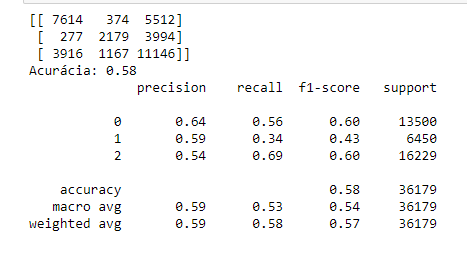

In [240]:
model = clf

In [250]:
dfT = pd.read_csv('SARESP_test.csv')

dfT = dfT.dropna(axis=1, thresh=int(len(dfT)/10), how="Any")

dfT.loc[dfT["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'


dfT = CA.typeEncoder(dfT,'object')


dfT = CA.typeEncoder(dfT,'object')



dataTrain = dfT.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)



x_test = dataTrain.drop(['nivel_profic_mat'],axis=1)
y_test = dataTrain['nivel_profic_mat']

In [251]:
y_pred = model.predict(x_test)

In [252]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = model.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[208  29 165]
 [  5 106  64]
 [ 93  90 240]]
Acurácia: 0.55
              precision    recall  f1-score   support

           0       0.68      0.52      0.59       402
           1       0.47      0.61      0.53       175
           2       0.51      0.57      0.54       423

    accuracy                           0.55      1000
   macro avg       0.55      0.56      0.55      1000
weighted avg       0.57      0.55      0.56      1000

